# Titanic Data Science Competition

The aim of this competition is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. In this notebook, I've drawn inspirations from Titanic Data Science Solutions by Manav Sehgal and Titanic Tutorial by Jason Chong. This is a beginner notebook with the purpose of familiarising myself with machine learning.

# Importing the relevant libraries

In [269]:
#Calling the relevant libraries
import numpy as np
import pandas as pd
import random as rnd
import missingno 
from collections import Counter

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For the Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#To ignore some warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the test & train data

In [270]:
#Loading the data
train_df = pd.read_csv("C:/Users/Lspan/Documents/Data Science Projects/Kaggle/Titanic/train.csv")
test_df = pd.read_csv("C:/Users/Lspan/Documents/Data Science Projects/Kaggle/Titanic/test.csv")
sub = pd.read_csv("C:/Users/Lspan/Documents/Data Science Projects/Kaggle/Titanic/gender_submission.csv")

In [271]:
#Taking a look at the features in the train data
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [272]:
#Taking another look at which features are categorical or numerical
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [273]:
#Another quick view of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Taking a look at the data types, Categorical features include: Survived, Pclass, Sex, Embarked. The Numerical features are: Age, SibSp, Parch and Fare. Ticket and Cabin are alphanumeric values

In [274]:
test_df.columns.values
#Test data doesn't have a Survived column

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [275]:
#Brief look at the Test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The Test dataset is missing the Survived column, this the "target" for the machine learning.

In [276]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [277]:
#Quick lookk at the Submission dataset
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [278]:
print('Train dataset total values: ', train_df.shape)
print('Test dataset total values: ', test_df.shape)
print('Submission dataset values: ',sub.shape)

Train dataset total values:  (891, 12)
Test dataset total values:  (418, 11)
Submission dataset values:  (418, 2)


In [279]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Another brief overview of the data tells us that 38% of the passengers in the train data survived.
Less than 25% of the passengers were above 38 years old; more than half travelled without a parent, sibling or spouse and 3 in every 4 passengers stayed in 3rd class.

# Data Exploration

In [280]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [281]:
#Taking a look at the null values in Train data
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [282]:
#Taking a look at the null values in Test data
test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In Train dataset, there are missing values in Cabin, Age and Embarked.
The Test dataset also appears to be missing values in Cabin, Age and Embarked.
Missing values will either need to dropped or replaced with values.

In [283]:
#Stats summary for Train
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [284]:
#Stats summary for Test
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The following are further displays of the missing values in the Train & Test datasets.

<AxesSubplot:>

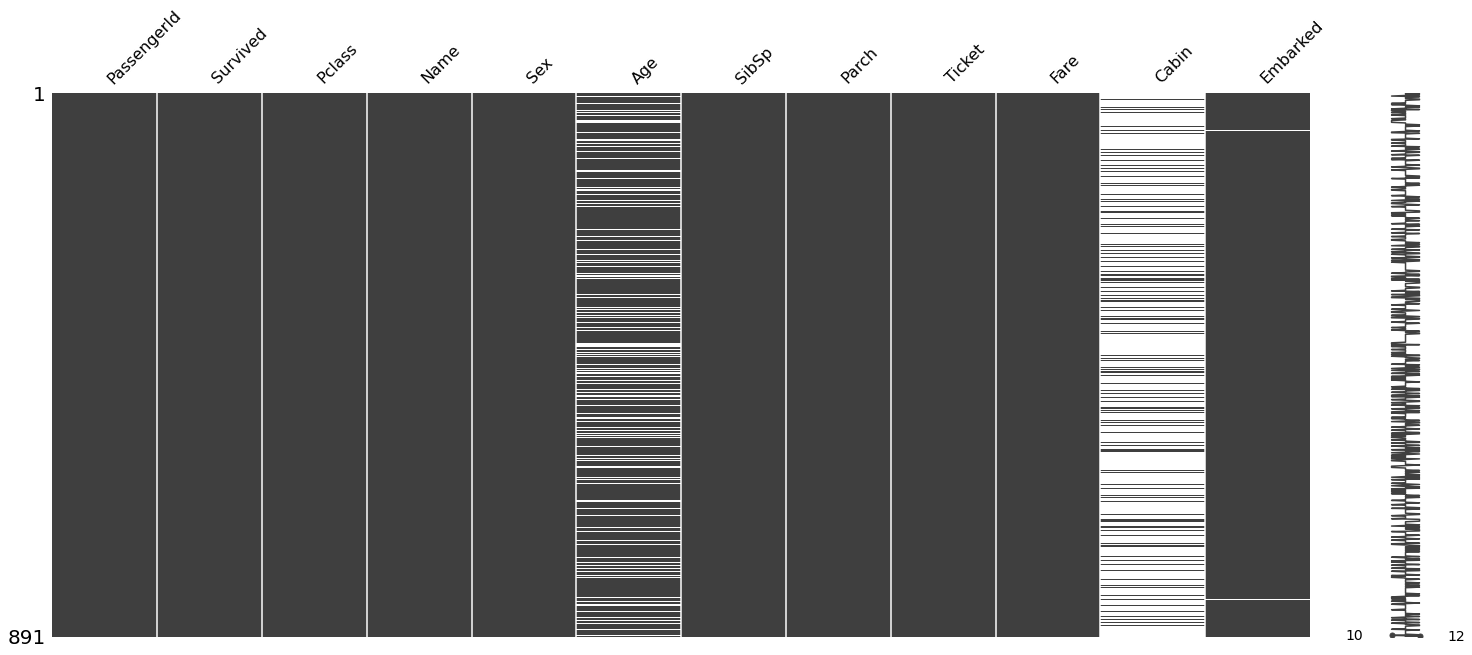

In [285]:
#Visualisation of the missing data in Train, which happens to be Age, Cabin and Embarked
missingno.matrix(train_df)

<AxesSubplot:>

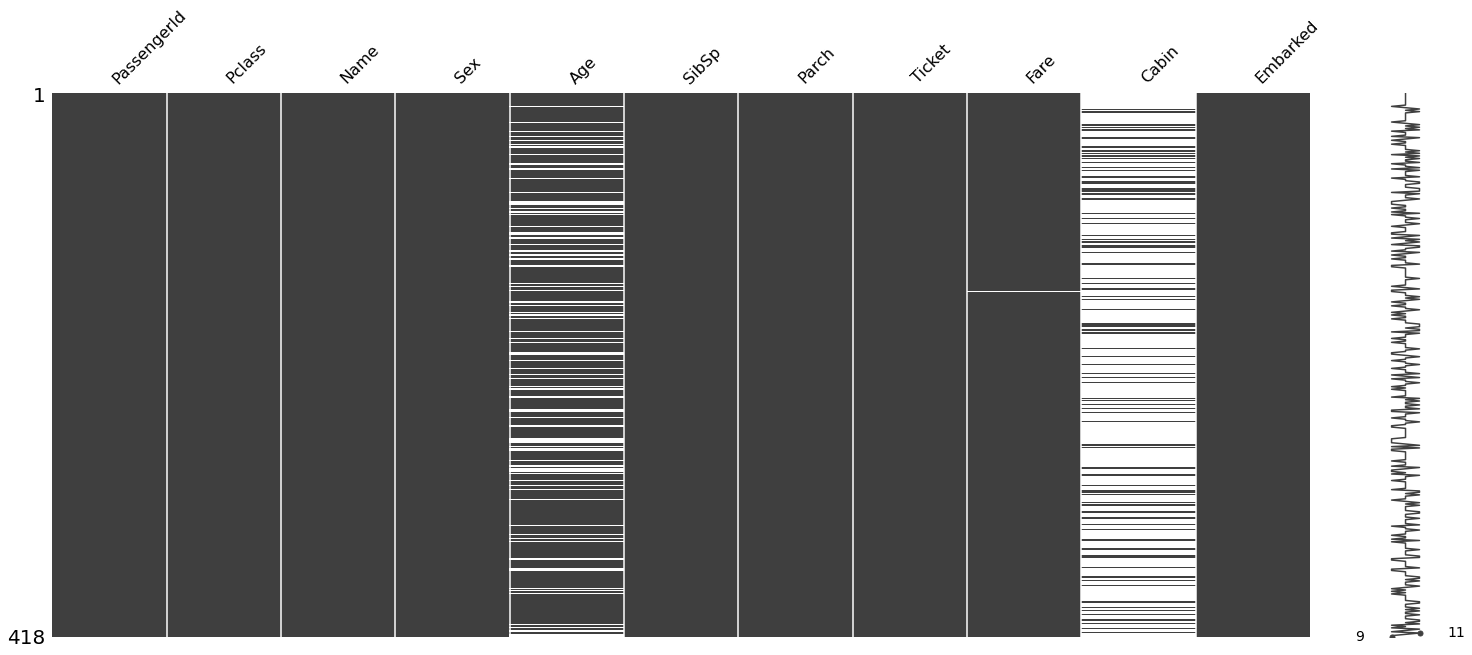

In [286]:
#Visualisation of the missing data in Test, which happens to be Age, Cabin and Fare
missingno.matrix(test_df)

# Categorical Features

Taking a look at the categorical features in Train dataset

# Sex Feature

In [287]:
#The male and female values within the Sex feature
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [288]:
#Percentage of women who survived
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women) / len(women) *100
#Percentage of men who survived
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men) / len(men) *100
print('The percentage of women who survived sits at: ',rate_women)
print('The percentage of men who survived is: ',rate_men)

The percentage of women who survived sits at:  74.20382165605095
The percentage of men who survived is:  18.890814558058924


Text(0.5, 1.0, 'Survival by Gender')

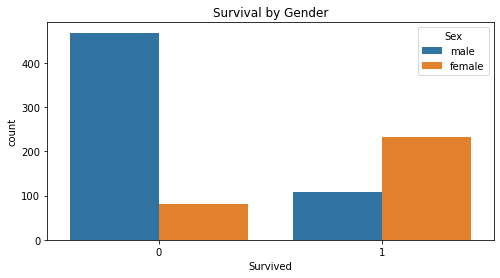

In [289]:
#Bar graph displaying the Sex ratio between those who survived and those who didn't
plt.figure(figsize=(8,4))
sns.countplot(x='Survived', hue='Sex', data= train_df)
plt.title('Survival by Gender')

# Pclass Feature

In [290]:
#Counting the individual Pclass values
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

1 = First Class, 2 = Second Class, 3 = Third/Economy Class

In [291]:
#The percentage of passengers who survived arranged by class 
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival by Class')

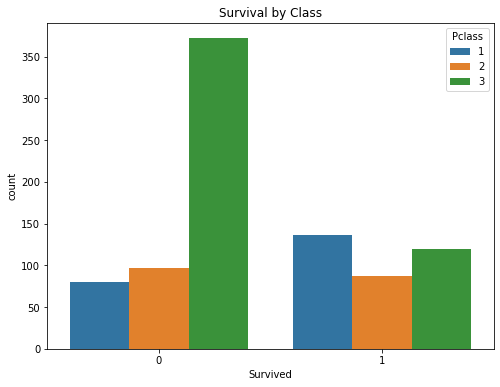

In [292]:
#The Pclass mapped into a bar chart
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data= train_df)
plt.title('Survival by Class')

# Embarked Feature

Embarked where: C = Cherbourg, Q = Queenstown, S = Southampton

In [293]:
#The number of passegngers who embaked on different ports
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Recall that 2 values were missing from the Embarked feature within Train

In [294]:
#The surviving passengers displayed who embarked at different ports
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', 
ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival by the Port Departure')

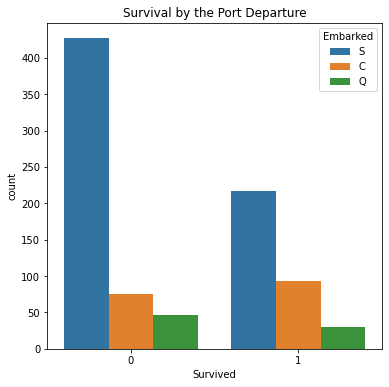

In [295]:
#Bar graph plotted for where passengers embarked from
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', hue='Embarked', data= train_df)
plt.title('Survival by the Port Departure')

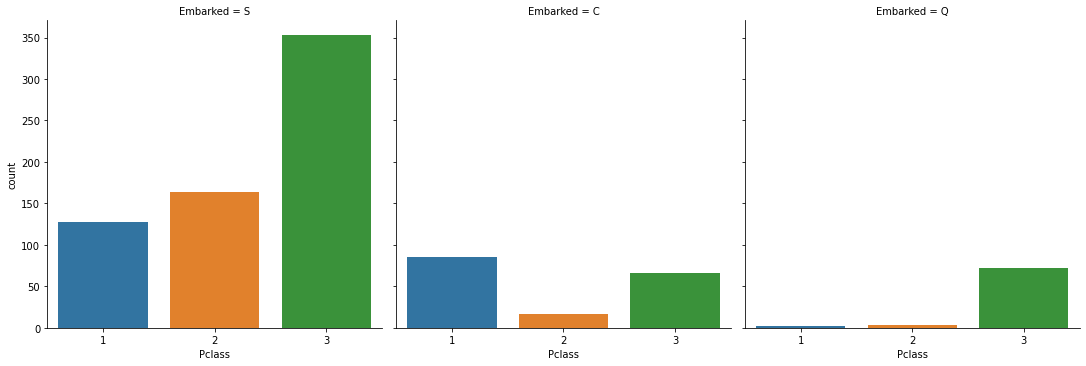

In [296]:
#Displaying which ports passengers boarded from in class
sns.catplot('Pclass', col = 'Embarked', data = train_df, kind = 'count')

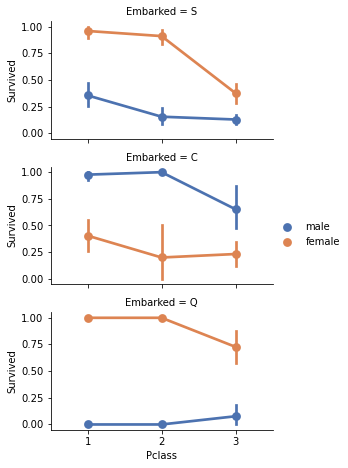

In [297]:
#Categorical Features displayed altogether
grid = sns.FacetGrid(train_df, row = 'Embarked', size = 2.2, aspect = 1.8)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

Summary of the Sex, Embarked and Pclass features:

In [298]:
#Pivot tables displaying the counts and where or not passengers survived 
print (pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print (pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print (pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Numerical Features

Numerical features are Age, Parch, SibSp and Fare.

<AxesSubplot:>

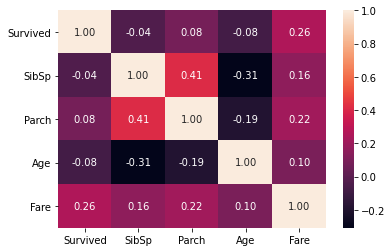

In [299]:
#Creating a heatmap of the possible correlation between Survived, SibSp, Parch and Age
sns.heatmap(train_df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f')

In [300]:
#Survival rate across Age, Fare, Parents & Sibling/Spouse
pd.pivot_table(train_df, index = 'Survived', values = ['Age', 'Fare', 'Parch', 'SibSp'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Fare seems to have a strong correlation with Survival.

## Age Feature

In [301]:
#The number of missing values in Age
train_df['Age'].isnull().sum()

177

The Age histograms displayed below:

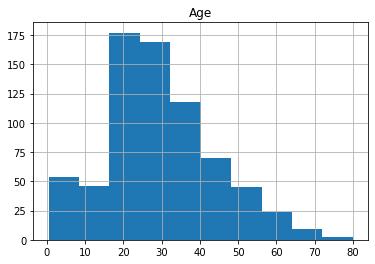

In [302]:
#Age Distribution throughout Train
train_df.hist(column='Age')
plt.show()

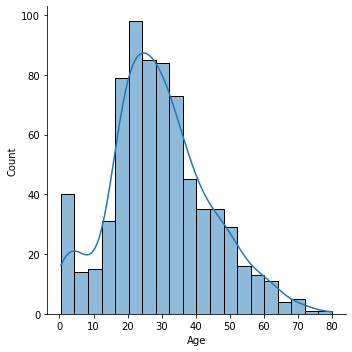

In [303]:
#Plotting the Age feature
sns.displot(train_df, x="Age", kde=True)

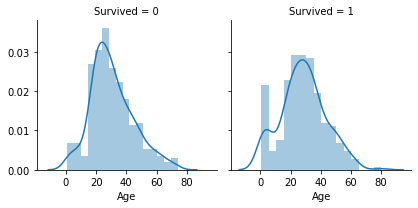

In [304]:
# Age distribution by survival
a = sns.FacetGrid(train_df, col = 'Survived')
a.map(sns.distplot, 'Age')

# Parch Feature

In [305]:
#Total values of 'Parents'
train_df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [306]:
#Quick look at who survived from those with & parents
pd.pivot_table(train_df, index = 'Survived', columns = 'Parch', values = 'Ticket', aggfunc = 'count')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


Making an observation, it immediately appears that if you were onboard with a parent, your chances of survival would rise. 

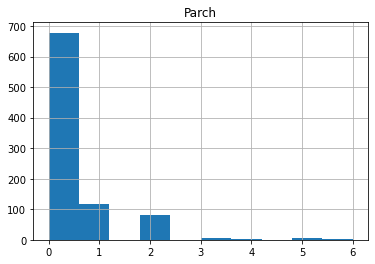

In [307]:
#Parents Distribution from Train
train_df.hist(column='Parch')
plt.show()

Text(0.5, 1.0, 'Survival Parch')

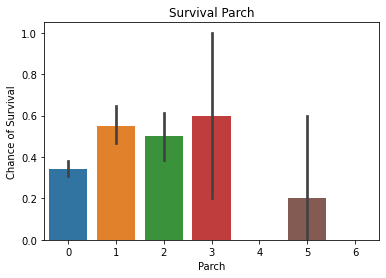

In [308]:
sns.barplot(x = 'Parch', y = 'Survived', data = train_df)
plt.ylabel('Chance of Survival')
plt.title('Survival Parch')

# Sibling/Spouse Feature

In [309]:
#Total values of siblings/spouses
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [310]:
pd.pivot_table(train_df, index = 'Survived', columns = 'SibSp', values = 'Ticket', aggfunc = 'count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


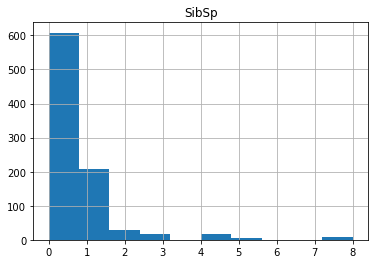

In [311]:
#Sibling/Spouse histograms below:
train_df.hist(column='SibSp')
plt.show()

Text(0.5, 1.0, 'Survival of Sibling/Spouse')

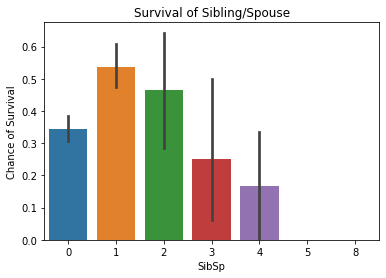

In [312]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train_df)
plt.ylabel('Chance of Survival')
plt.title('Survival of Sibling/Spouse')

# Fare Feature

In [313]:
#Recalling Fare data type and the number of missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0, 0.5, 'Passenger Fare Distribution')

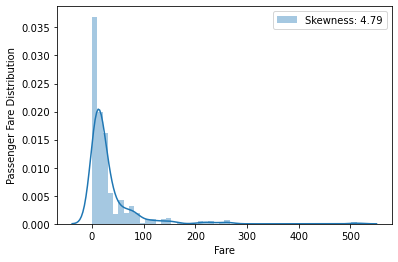

In [314]:
sns.distplot(train_df['Fare'], label = 'Skewness: %.2f'%(train_df['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

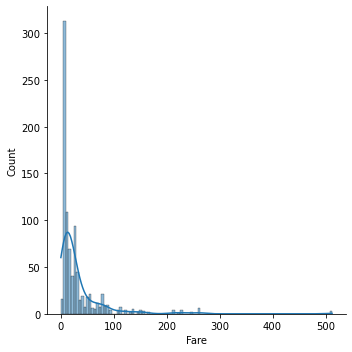

In [315]:
sns.displot(train_df, x="Fare", kde=True)

# Observations

It appears that if you were younger(>28) your chances of survival were higher; a higher fare payed resulted in a higher survival; if you had a parent(s) onboard it would assist your survival but if you had a sibling or spouse your chance of survival was lowered.

# Data Preprocessing (Train)

Filling in the missing and Nan values for the Features, dropping certain features too. In order to train the model for the testing, all missing & none values need to be replaced.

# Age Values

In [316]:
#The missing values in Train data
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [318]:
#Filling the null/nan values in Age with the average age.
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# Fare Values

In [319]:
#Filling the null/nan values in Fare with the average, Median may also have worked because of skewed distribution
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# Embarked Values

In [320]:
#Gathering the most frequent embarked value. S = Southampton
mode = train_df['Embarked'].dropna().mode()[0]
mode

'S'

In [323]:
#Filling the missing Embarked values
train_df['Embarked'].fillna(mode, inplace=True)
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

 The features Cabin, Name and Ticket won't be needed for the testing.

# Data Preprocessing (Test) 

# Age Values 

In [324]:
#Missing values for the Test data
test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [327]:
#Filling in missing Age values with the median value from Test
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

# Fare Values 

In [328]:
test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [331]:
#Filling the missing Fare values with the mean of Fare from Test
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)
test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# Dropping Features (Test/Train)

In [332]:
#Dropping the Cabin, Name & Ticket features for the test_df
train_df.drop(columns = ['Cabin'], axis = 1, inplace =True)
train_df.drop(columns = ['Name'], axis = 1, inplace =True)
train_df.drop(columns = ['Ticket'], axis = 1, inplace =True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [333]:
#Dropping the Cabin, Name & Ticket features on Test
test_df.drop(columns = ['Cabin'], axis = 1, inplace =True)
test_df.drop(columns = ['Name'], axis = 1, inplace =True)
test_df.drop(columns = ['Ticket'], axis = 1, inplace =True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [392]:
#Combining the Test & Train datasets
combi = pd.concat([train_df, test_df], axis = 0).reset_index(drop =True)
combi.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [335]:
print(train_df.shape)

(891, 9)


In [336]:
print(test_df.shape)

(418, 8)


In [393]:
print(combi.shape)

(1309, 9)


In [394]:
#Checking that the only missing values from the combined data Survived, our targets
combi.isnull().sum().sort_values(ascending = False)

Survived       418
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [395]:
#Converting male and female to 0 and 1
combi['Sex'] = combi['Sex'].map({'male': 0, 'female': 1})
combi.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,22.0,1,0,7.2500,S
1,2,1.0,1,1,38.0,1,0,71.2833,C
2,3,1.0,3,1,26.0,0,0,7.9250,S
3,4,1.0,1,1,35.0,1,0,53.1000,S
4,5,0.0,3,0,35.0,0,0,8.0500,S


In [396]:
#Seperating Embarked with values rather than C, Q & S
combi = pd.get_dummies(combi, columns = ['Embarked'], prefix ='Embkd')
combi.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embkd_C,Embkd_Q,Embkd_S
0,1,0.0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,1,0,0
2,3,1.0,3,1,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,0,35.0,0,0,8.0500,0,0,1


In [397]:
#Splitting Fare into 4 fare ranges
combi['FareBand'] = pd.cut(combi['Fare'], 4)
combi[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [398]:
#Giving the fare range values.
combi.loc[combi['Fare'] <= 128.082, 'Fare'] = 0
combi.loc[(combi['Fare'] > 128.082) & (combi['Fare'] <= 256.165 ), 'Fare'] = 1
combi.loc[(combi['Fare'] > 256.165) & (combi['Fare'] <= 384.247), 'Fare'] = 2
combi.loc[combi['Fare'] > 384.247, 'Fare'] = 3

In [399]:
#Converting the Fare feature into a integer type
combi['Fare'] = combi['Fare'].astype('int')

In [424]:
combi.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embkd_C,Embkd_Q,Embkd_S
1304,1305,NaN,3,0,27.0,0,0,0,0,0,1
1305,1306,NaN,1,1,39.0,0,0,0,1,0,0
1306,1307,NaN,3,0,38.5,0,0,0,0,0,1
1307,1308,NaN,3,0,27.0,0,0,0,0,0,1
1308,1309,NaN,3,0,27.0,1,1,0,1,0,0


In [401]:
#Dropping Fareband
combi = combi.drop('FareBand', axis = 1)

In [402]:
combi.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embkd_C,Embkd_Q,Embkd_S
0,1,0.0,3,0,22.0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,0,0,0,1


In [403]:
train_df = combi[:len(train_df)]
test_df = combi[len(test_df):]

In [404]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embkd_C,Embkd_Q,Embkd_S
0,1,0.0,3,0,22.0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,0,0,0,1


In [405]:
#Dropping the PassengerId feature
train_df = train_df.drop('PassengerId', axis = 1)

In [406]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embkd_C,Embkd_Q,Embkd_S
0,0.0,3,0,22.0,1,0,0,0,0,1
1,1.0,1,1,38.0,1,0,0,1,0,0
2,1.0,3,1,26.0,0,0,0,0,0,1
3,1.0,1,1,35.0,1,0,0,0,0,1
4,0.0,3,0,35.0,0,0,0,0,0,1


In [407]:
#Changing the Survived feature into a integer
train_df['Survived'] = train_df['Survived'].astype('int')

In [409]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    int32  
 7   Embkd_C   891 non-null    uint8  
 8   Embkd_Q   891 non-null    uint8  
 9   Embkd_S   891 non-null    uint8  
dtypes: float64(1), int32(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [410]:
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embkd_C,Embkd_Q,Embkd_S
418,419,0.0,2,0,30.000000,0,0,0,0,0,1
419,420,0.0,3,1,10.000000,0,2,0,0,0,1
420,421,0.0,3,0,29.699118,0,0,0,1,0,0
421,422,0.0,3,0,21.000000,0,0,0,0,1,0
422,423,0.0,3,0,29.000000,0,0,0,0,0,1


In [425]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 418 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    int32  
 7   Embkd_C      891 non-null    uint8  
 8   Embkd_Q      891 non-null    uint8  
 9   Embkd_S      891 non-null    uint8  
dtypes: float64(1), int32(1), int64(5), uint8(3)
memory usage: 48.0 KB


In [411]:
#Dropping the Survived feature from Test
test_df = test_df.drop('Survived', axis = 1)

In [412]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embkd_C,Embkd_Q,Embkd_S
418,419,2,0,30.000000,0,0,0,0,0,1
419,420,3,1,10.000000,0,2,0,0,0,1
420,421,3,0,29.699118,0,0,0,1,0,0
421,422,3,0,21.000000,0,0,0,0,1,0
422,423,3,0,29.000000,0,0,0,0,0,1


# Modelling and Prediction

Now we are ready to train a model and predict the required solution. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). I have chosen the following classifiers for the job:
Logistitic Regression
Random Forest
Decision Tree

# Splitting the data 

In [413]:
#Dropping the Survived columns, assiging the Train & Test
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (891, 9))

In [414]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [415]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

93.71

In [416]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.71

In [417]:
#Displaying the results of the different accuracies of the Models
models = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
                       'Score': [acc_log, acc_random_forest, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,93.71
1,Decision Tree,93.71
2,Logistic Regression,80.36


As this is a beginner competition, the performance tuning of each Model will be left for improved versions of this notebook.

In [426]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [434]:
Y_pred.shape

(891,)

In [437]:
sub.shape

(891, 2)

In [438]:
# Create submission dataframe
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': Y_pred})
submission.head()

,PassengerId,Survived
418,419,0
419,420,0
420,421,0
421,422,0
422,423,0


In [439]:
submission.shape

(891, 2)

In [442]:
submission.to_csv('C:/Users/Lspan/Documents/Data Science Projects/Kaggle/Titanic/Submission.csv', index = False)

# Conclusion

In conclusion, the Decision Tree and Random Forest models both produced a 93,71% accuracy but judging by otther notebook examples, an accuracy this high might be the result of overfitting the models. In future versions of this notebook, more feature engineering for Name will need to be done, as well as finding better values for the missing values in Age & Fare, I could explore the outcomes with the using the mean & median for both.

The best performing model in that regard was the Logistic Regression with a 80.36% accuracy for predicting the Titanic survival rate.